# Unsupervised Learning

- It is a branch of machine learning where algorithms learn from unlabeled data (no target)
- Data points within a cluster share common properties, different from neighboring clusters
- Types of Unsupervised learning:
    - **Clustering** grouping similar data points together e.g. grouping fruits based on similar color, shape, texture, flavor, etc..
    - **Dimensionality Reduction** Using ML algorithms to simplify/summarize the number of features (dimensions) while preserving the essential information. It's mainly used for visualization and improving performance.
    - **Association** Discovering relationship between items e.g. recommendation engines
    - **Anomaly Detection** spotting an outlier in the data.
- Applications:
    - Customer segmentation: for marketing or customer service. e.g. Like grouping customers based on purchasing behavior and cluster into segments based on their purchasing patterns.
    - Anomaly detection: spotting unusual activity (cyber security) or fraudulent transactions
    - Recommendation systems: providing proper recommendation based on user preference (Netflix, Prime, etc...) e.g. Finding ppl who share an interest e.g. travel to cold countries for snow activities.


## Types of Clustering Algorithms
- Centroid-Based Clustering: Dividing the data into K clusters by minimizing the variance within clusters.
    - K-Means Clustering
    - K-Medoids Clustering

![km](https://www.researchgate.net/publication/342871651/figure/fig1/AS:912165510864897@1594488613267/The-graphical-representation-of-the-difference-between-the-k-means-and-k-medoids.png)

- Density-Based Clustering: Grouping the data into dense regions of data points together. it marks outliers as noise (based on clustering criteria).
    - DBSCAN (Density-Based Spatial CLustering of Applications with Noise)

![dbscan](https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41598-023-45190-4/MediaObjects/41598_2023_45190_Fig1_HTML.png)

- Hierarchical CLustering:
    - Agglomerative Hierarchical Clustering:
        - Start from each data point as its own cluster
        - It merges separate clusters based on similarities iteratively 
        - Bottom to top
    - Divisive Hierarchical CLustering
        - opposite Agglomerative, it stars with defining all data points as one group
        - then, it recursively breaks the main group down into sub groups (smaller clusters)
        - Top to bottom
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/New/Lesson_06_Unsupervised_Learning/dendogram.png)

- **Distribution-Based Clustering** 
    - GMM (Gaussian Mixture Model): Assumes that data points are generated from a mixture of gaussian distributions.

![GMM](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_gaussian-mixture-model.jpg)

### Exercise: Visualizing K-Means Clustering.

- Choose 3 of the Type 1 categories from the data.
- Remove classes and use unsupervised learning to determine the classes based on 2 features (Pokemon attributes)
    - Attack
    - Defense 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [68]:
path = '/Users/bassel_instructor/Documents/Datasets/'
df = pd.read_csv(path+'pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [69]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [70]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

1. get 3 of Type 1 categories 
2. remove other descriptive columns 

In [71]:
typ1_filter = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 2', '#', 'Generation', 'Legendary']

In [72]:
df_org = df.copy()

In [73]:
df = df[typ1_filter].drop(columns=drop_cols, axis=1)
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Ivysaur,Grass,405,60,62,63,80,80,60
2,Venusaur,Grass,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


### Build K-Means Clusters:
- Define our K-Means clusters with k value of 3 
- Fit the data on Attack and Defense, then add the cluster label to the data
- Visualize the clusters:
    1. Calculate centroids
    2. Define colors for each cluster
    3. Plot all the elements

In [74]:
kmeans_model = KMeans(n_clusters=3, random_state=10)

In [75]:
df['Cluster'] = kmeans_model.fit_predict(df[['Attack', 'Defense']])

In [76]:
df['Cluster'].unique()

array([0, 1, 2], dtype=int32)

In [77]:
centroids = kmeans_model.cluster_centers_
print(centroids)

[[ 51.22222222  50.22222222]
 [ 82.08        75.91      ]
 [114.09090909 103.15909091]]


We get 6 values for X, y values for 3 centroids because we have 3 clusters.

In [78]:
cent_x = centroids[:,0]
cent_y = centroids[:,1]

print('X coordinates for centroids:', cent_x)
print('Y coordinates for centroids:', cent_y)

X coordinates for centroids: [ 51.22222222  82.08       114.09090909]
Y coordinates for centroids: [ 50.22222222  75.91       103.15909091]


Add the centroids to the dataframe

In [79]:
df['CentX'] = df['Cluster'].map({0:cent_x[0],
                                 1:cent_x[1],
                                 2:cent_x[2]})
#alternative method: cent_x[df['Cluster']].astype(float)
df['CentY'] = df['Cluster'].map({0:cent_y[0],
                                 1:cent_y[1],
                                 2:cent_y[2]})



In [80]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY
0,Bulbasaur,Grass,318,45,49,49,65,65,45,0,51.222222,50.222222
1,Ivysaur,Grass,405,60,62,63,80,80,60,0,51.222222,50.222222
2,Venusaur,Grass,525,80,82,83,100,100,80,1,82.080000,75.910000
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,2,114.090909,103.159091
4,Charmander,Fire,309,39,52,43,60,50,65,0,51.222222,50.222222


In [81]:
color_list = ['#eb4034', '#95eb34', '#34d5eb']
df['ClusterColor'] = df['Cluster'].map(lambda c: color_list[c])
df.head()


,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster,CentX,CentY,ClusterColor
0,Bulbasaur,Grass,318,45,49,49,65,65,45,0,51.222222,50.222222,#eb4034
1,Ivysaur,Grass,405,60,62,63,80,80,60,0,51.222222,50.222222,#eb4034
2,Venusaur,Grass,525,80,82,83,100,100,80,1,82.080000,75.910000,#95eb34
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,2,114.090909,103.159091,#34d5eb
4,Charmander,Fire,309,39,52,43,60,50,65,0,51.222222,50.222222,#eb4034


In [82]:
plt.style.use('dark_background')

Text(0.5, 1.0, 'Pokemon K-Means Clusters Based on Attack and Defense')

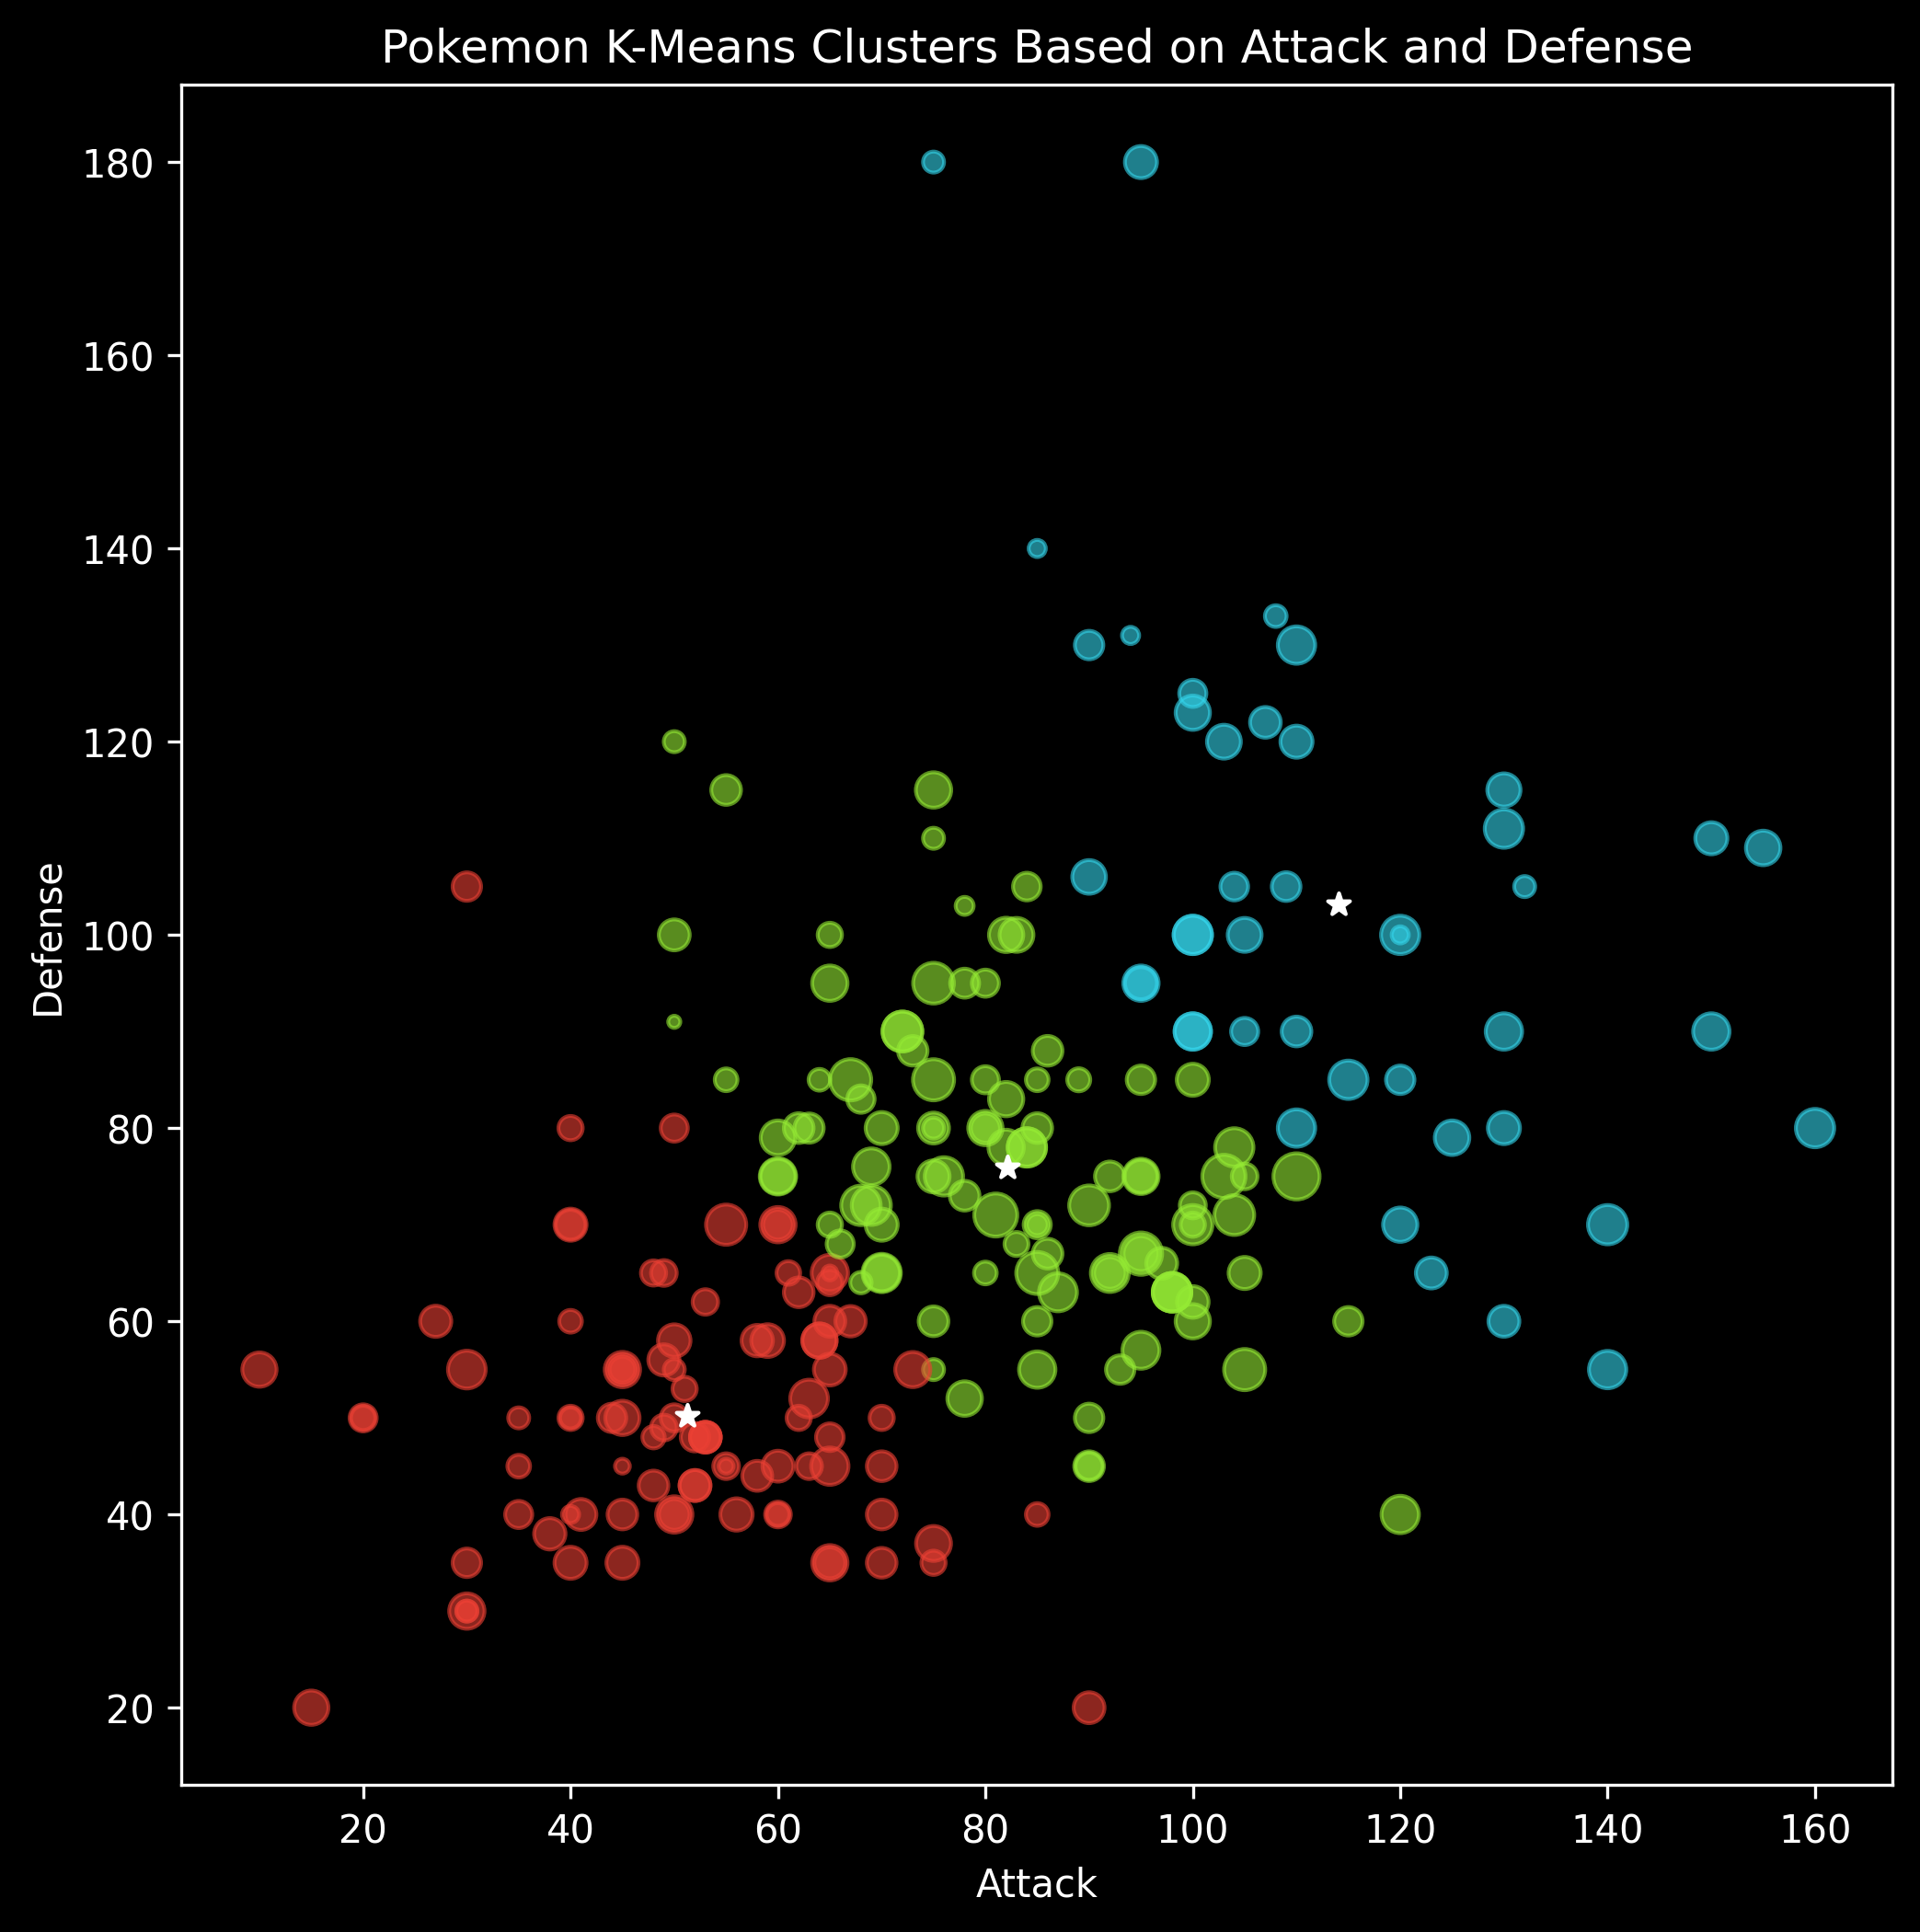

In [83]:
plt.figure(figsize=(8,8), dpi=300)

#data points
plt.scatter(x=df['Attack'], y=df['Defense'], c=df['ClusterColor'], alpha=0.6, s=df['Speed'])
#centroid points
plt.scatter(x=cent_x, y=cent_y, c='white', marker='*')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Pokemon K-Means Clusters Based on Attack and Defense')

Text(0, 0.5, 'Defense')

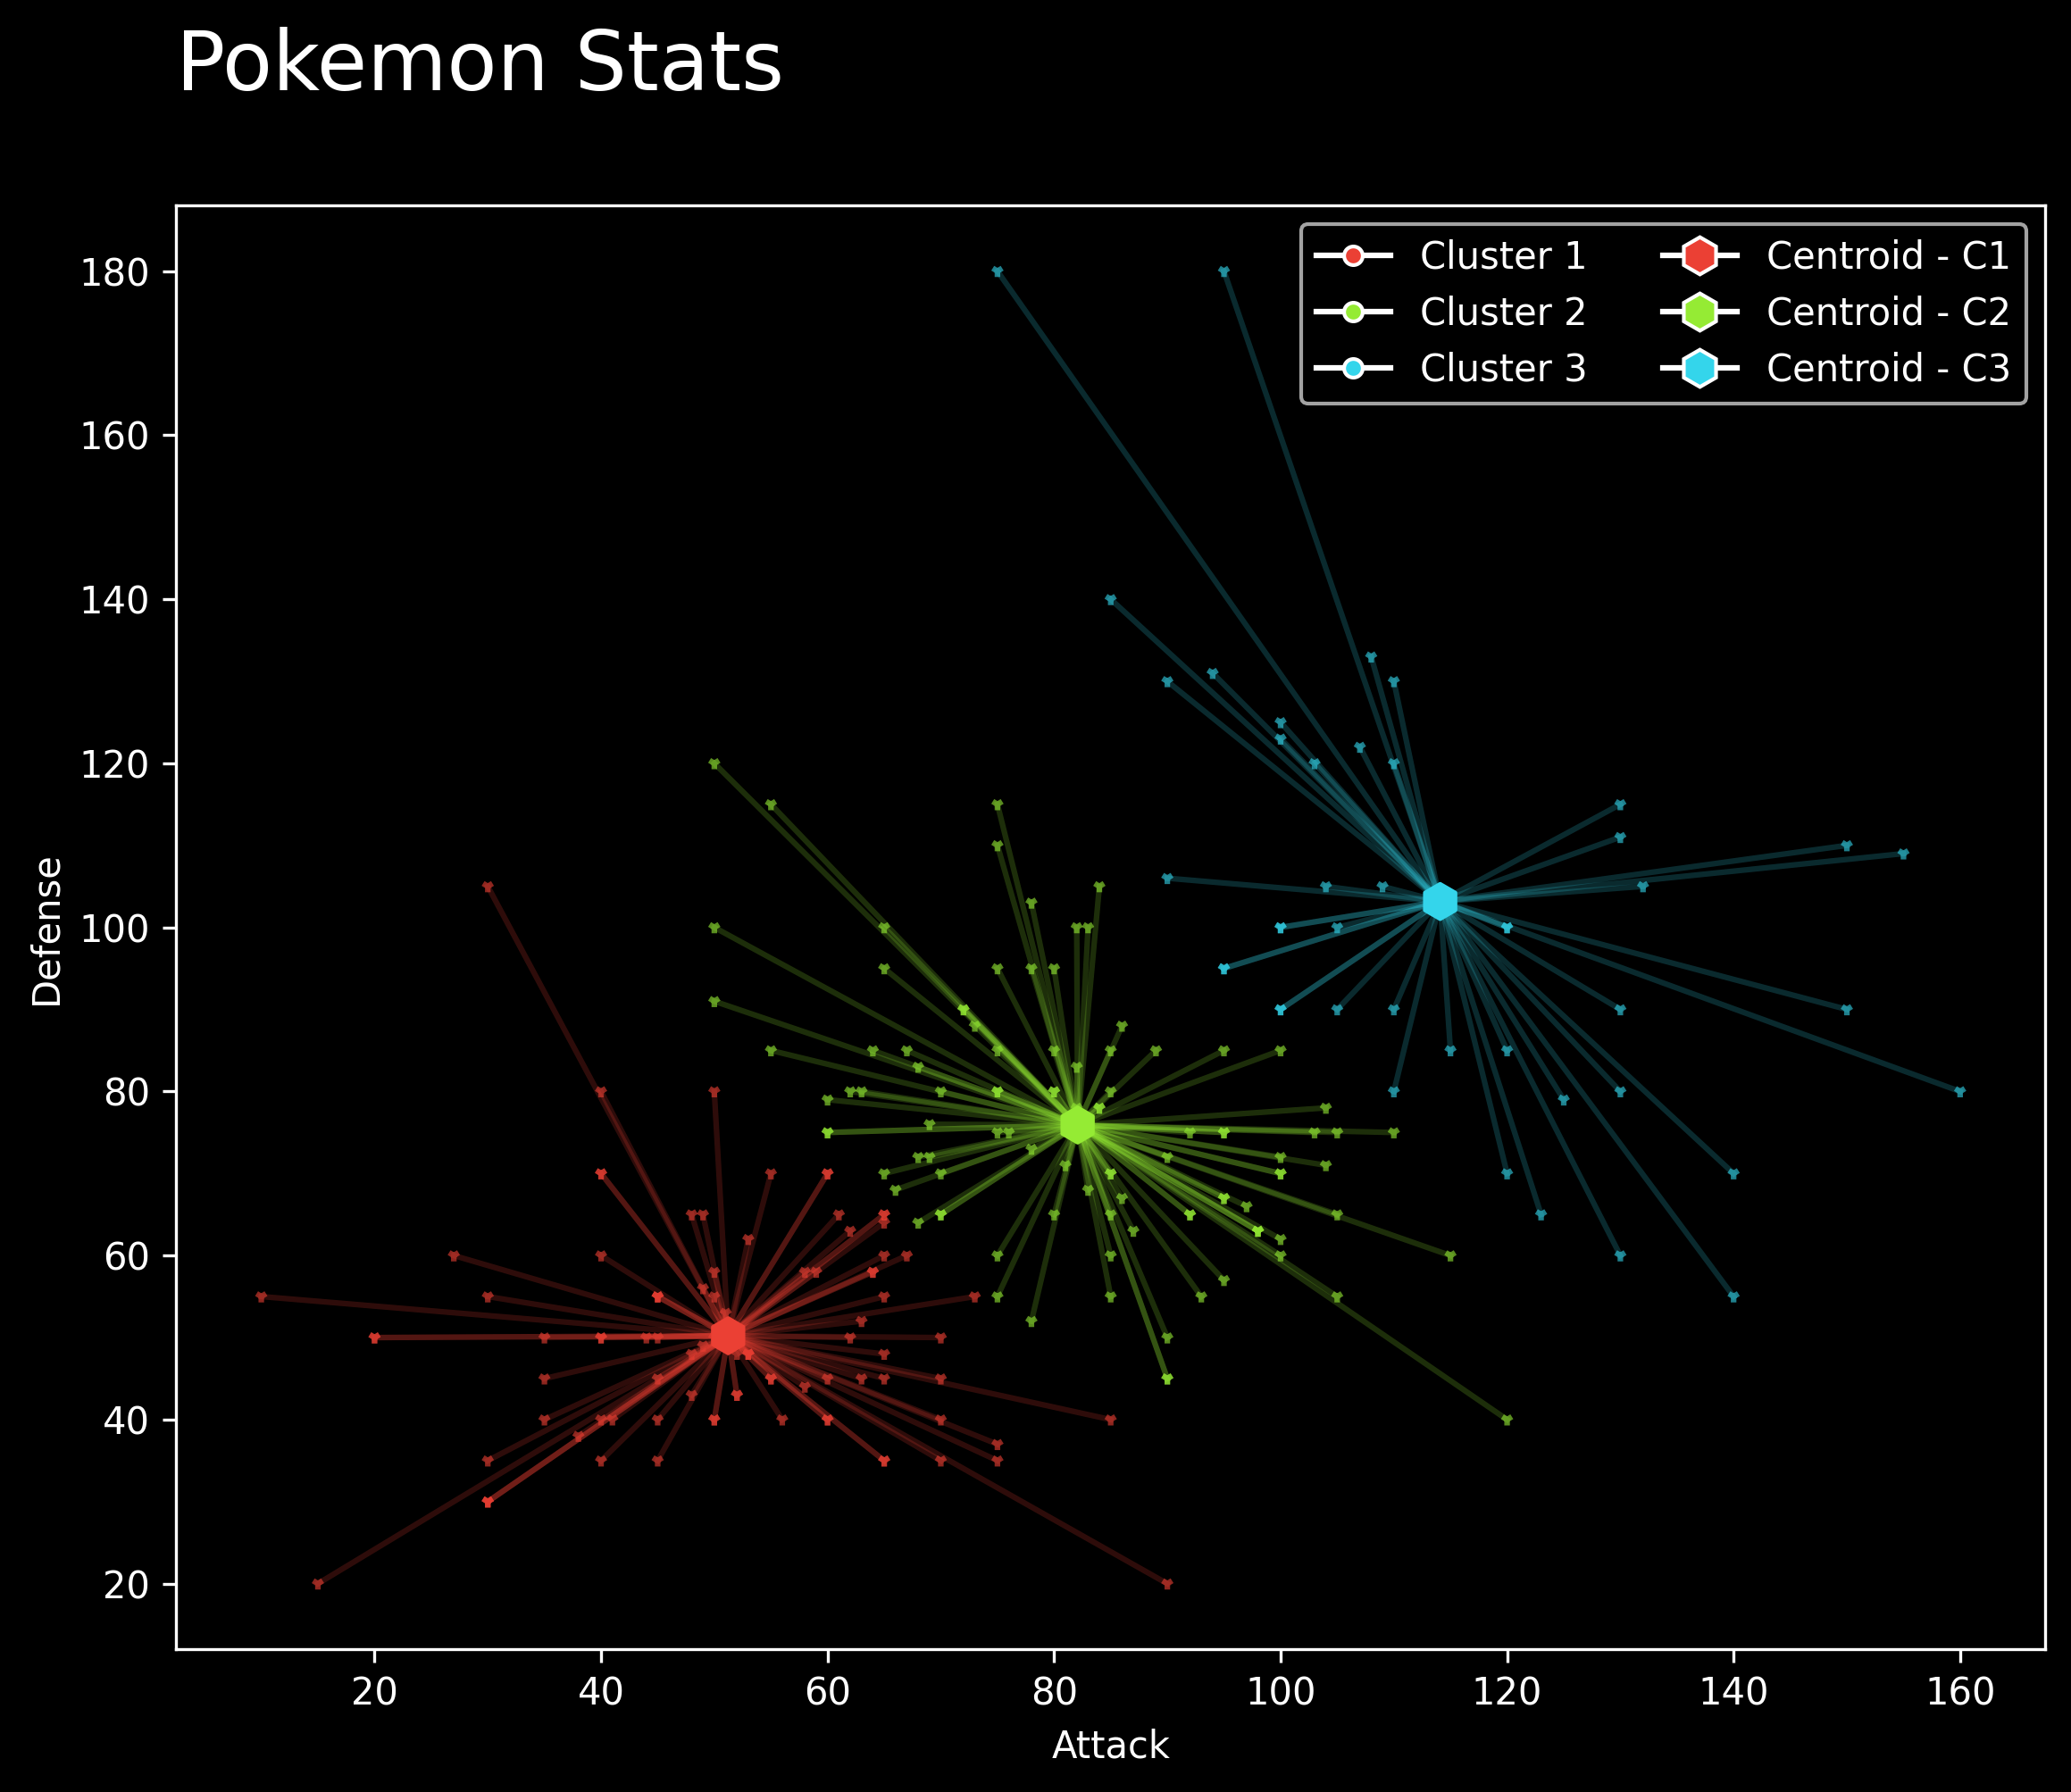

In [84]:
from matplotlib import lines
fig, ax = plt.subplots(figsize=(9, 7), dpi=300)

# Scatter plot for data points
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha=0.6, s=10, marker='1')

# Scatter plot for centroids
plt.scatter(cent_x, cent_y, marker='h', c=color_list, s=90)

# Draw lines from each point to its respective centroid
for _, row in df.iterrows():
    plt.plot([row.Attack, row.CentX], [row.Defense, row.CentY], c=row['ClusterColor'], alpha=0.2)

# Create legend elements
legend_elements = [
    lines.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', markerfacecolor=color, markersize=5)
    for i, color in enumerate(color_list)
]
legend_elements += [
    lines.Line2D([0], [0], marker='h', color='w', label=f'Centroid - C{i+1}', markerfacecolor=color, markersize=10)
    for i, color in enumerate(color_list)
]

# Add legend to the plot
plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# Add plot labels and title

plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

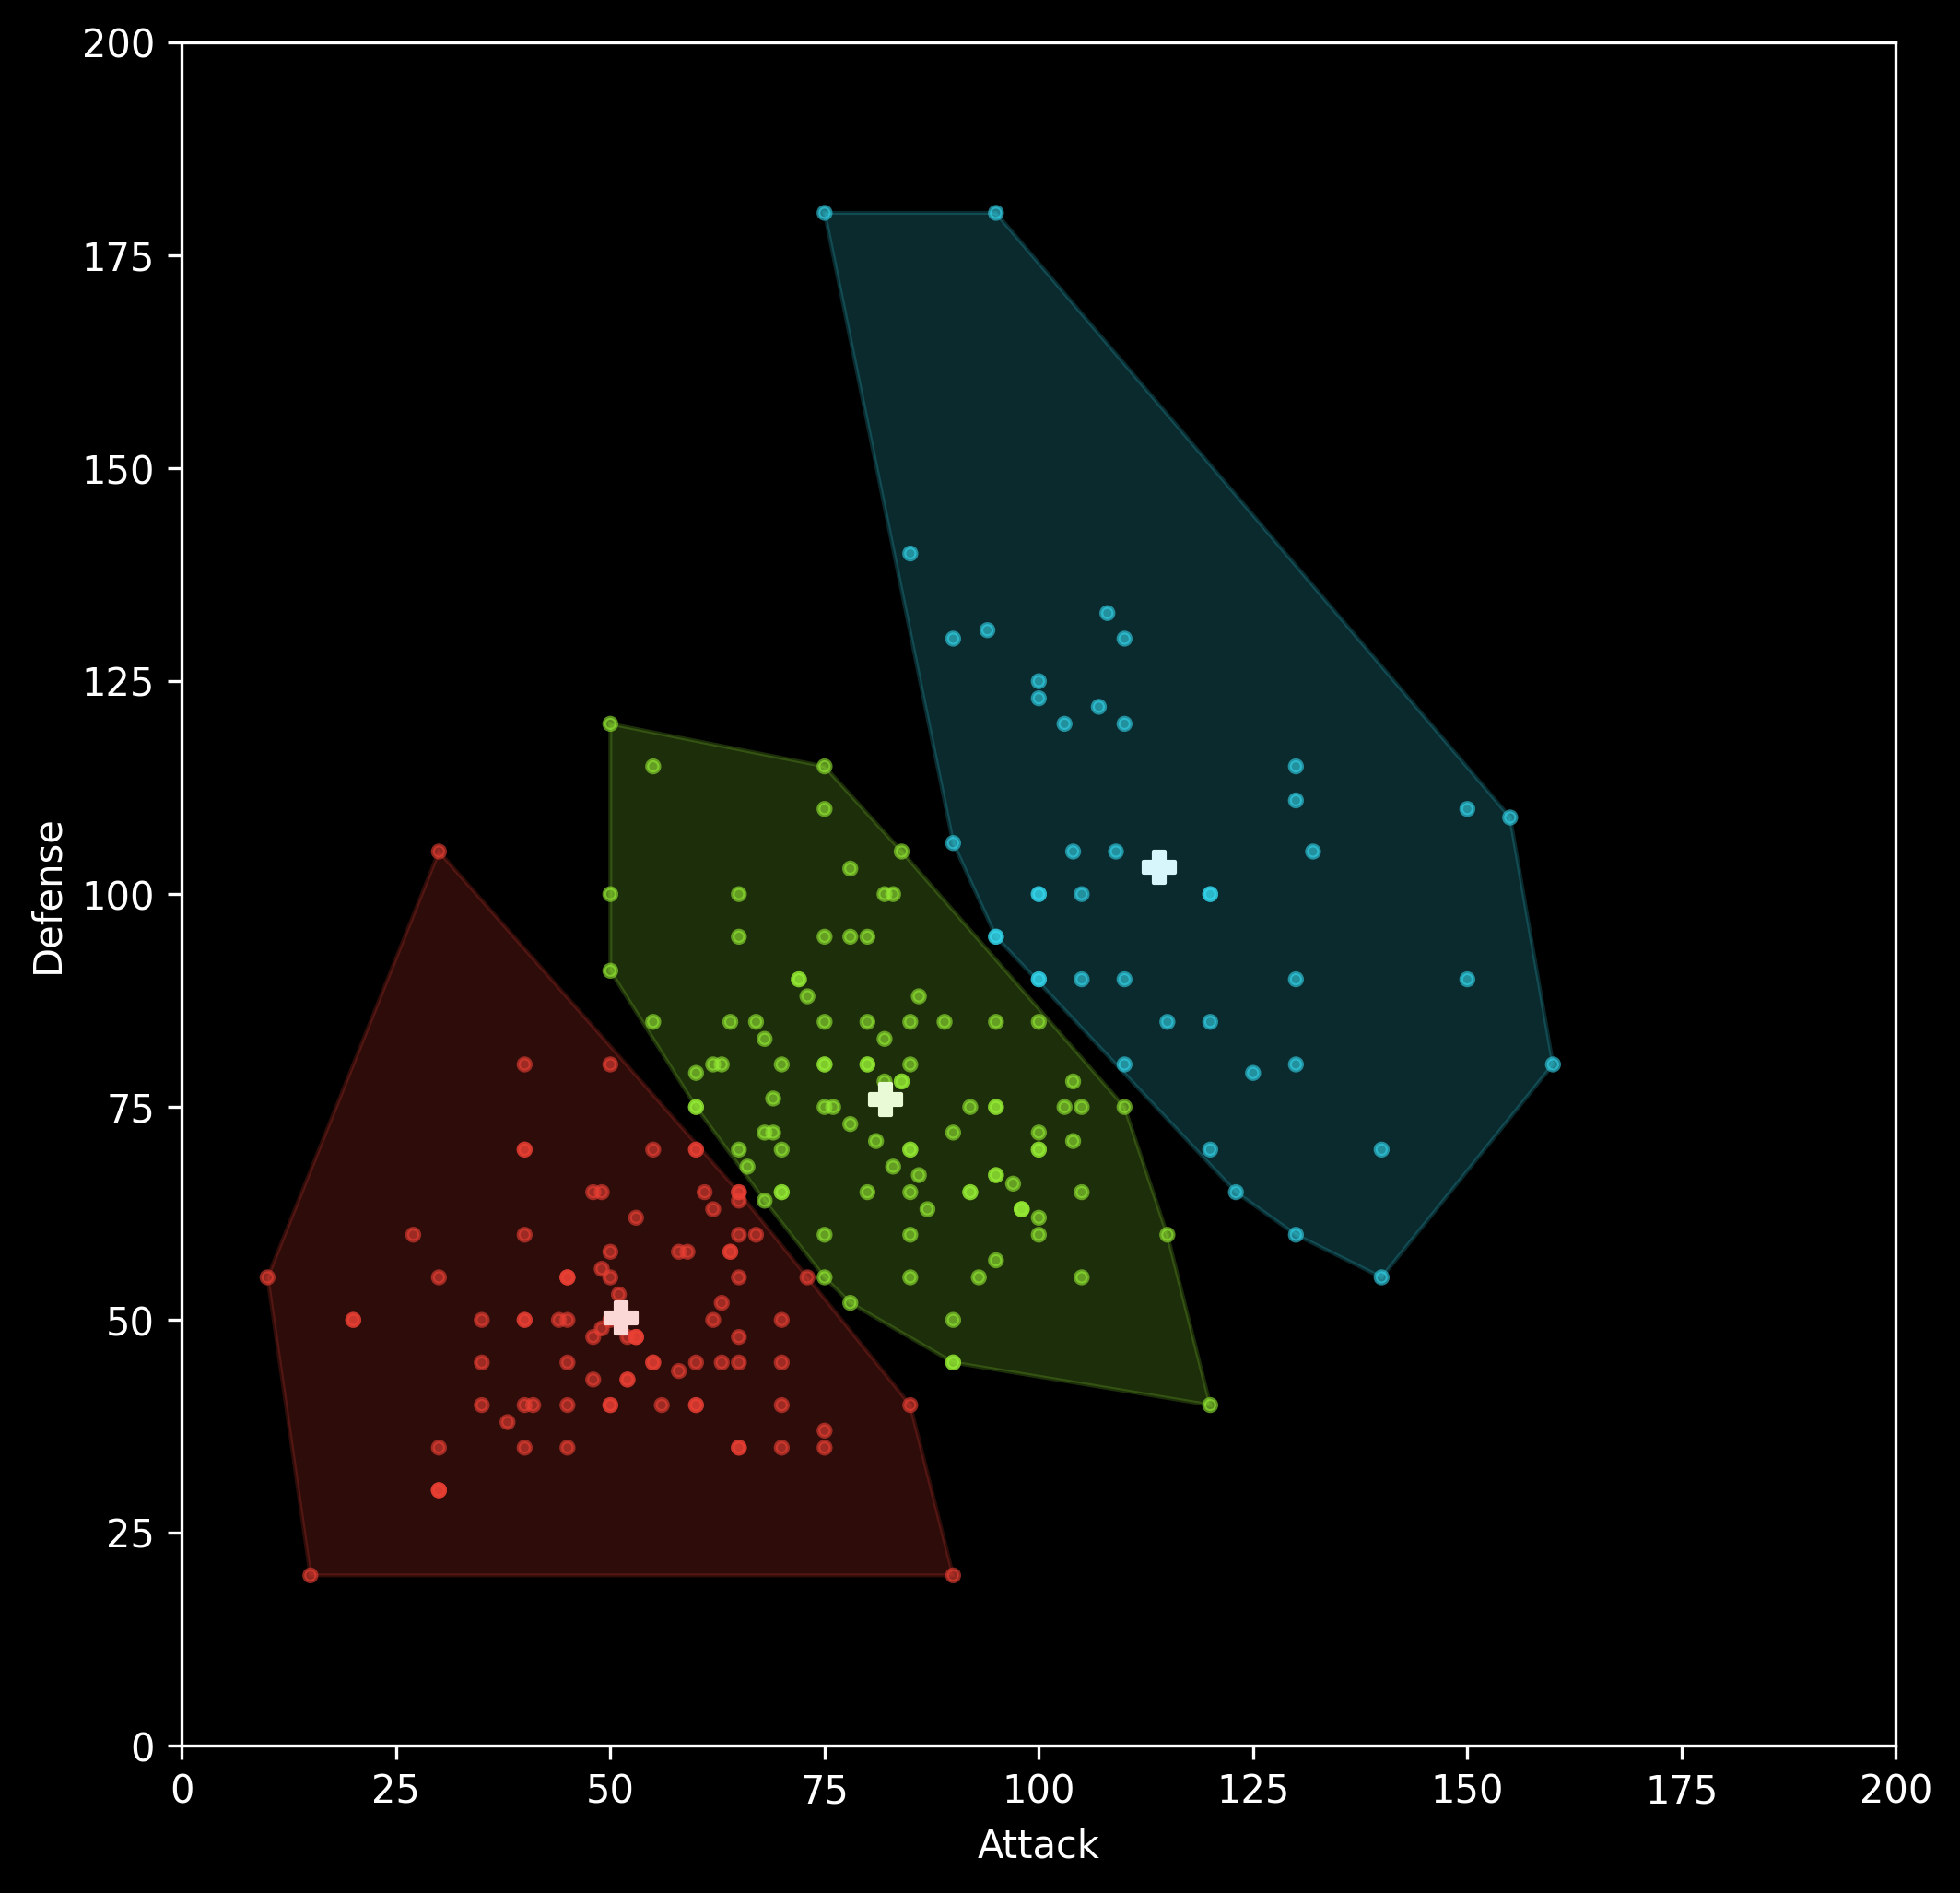

In [85]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8), dpi=300)
plt.scatter(df['Attack'], df['Defense'], c=df['ClusterColor'], alpha = 0.6, s=10)
plt.scatter(cent_x, cent_y, marker='P', c='white', s=70)
for i in df['Cluster'].unique():
    points = df[df['Cluster'] == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    plt.fill(x_hull, y_hull, alpha=0.2, c=color_list[i])
    
plt.xlim(0,200)
plt.ylim(0,200)
plt.xlabel('Attack')
plt.ylabel('Defense')


> Typically we don't have a target category to compare it to our clusters, but in this exercise it's a special case.

In [54]:
cont_table = pd.crosstab(df['Cluster'], df['Type 1'])
cont_table

Type 1,Fire,Grass,Water
Cluster,,,
0,18,28,44
1,20,33,47
2,14,9,21


**Bonus** only perform this analysis if you have some labeled data for evaluation

In [34]:
from scipy.stats import chi2_contingency

In [55]:
chi2, p_val, dof, exp_freq = chi2_contingency(cont_table)


In [57]:
alpha = 0.05
if p_val<alpha:
    print("Reject the null hypothesis. There's an association between KMeans Clusters and Type 1 Pokemon")
else:
    print("Accept the null hypotheiss. There's no association between KMeans Clusters and Type 1 Pokemon")

Accept the null hypotheiss. There's no association between KMeans Clusters and Type 1 Pokemon


There's no association between clusters 0,1,2 and Type 1. This could be due to needing additional features to complete the picture. We only picked Attack and Defense for our clusters. 

Cluster Evaluation Using Silhouette Score

In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df[['Attack', 'Defense']], df['Cluster'])
print('Silhouette Score:', round(score,2))

Silhouette Score: 0.37


- Close +1: A cluster that's well-separated.
- Around 0: Clusters overlap
- Negative: Poor clustering

### Additional Analysis

In [26]:
df.columns

Index(['Name', 'Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Cluster', 'CentX', 'CentY', 'ClusterColor'],
      dtype='object')

In [28]:
df.groupby(['Cluster'])[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']].agg(['mean','median','min', 'max']).T

Cluster                  0       1           2
Total   mean    330.544444  472.39  557.340909
        median  317.000000  480.00  540.000000
        min     180.000000  305.00  325.000000
        max     540.000000  634.00  770.000000
HP      mean     55.355556   77.50   83.704545
        median   50.000000   75.00   89.000000
        min      20.000000   30.00   30.000000
        max     130.000000  170.00  115.000000
Attack  mean     51.222222   82.08  114.090909
        median   51.500000   82.00  110.000000
        min      10.000000   50.00   75.000000
        max      90.000000  120.00  160.000000
Defense mean     50.222222   75.91  103.159091
        median   50.000000   75.00  100.000000
        min      20.000000   40.00   55.000000
        max     105.000000  120.00  180.000000
Sp. Atk mean     59.211111   88.24   97.227273
        median   60.000000   90.00   95.000000
        min      10.000000   15.00   25.000000
        max     140.000000  159.00  180.000000
Sp. Def mean     56.711111   76.15   87.818182
        median   54.500000   75.00   85.000000
        min      20.000000   25.00   25.000000
        max     140.000000  129.00  160.000000
Speed   mean     57.822222   72.51   71.340909
        median   60.000000   70.00   76.000000
        min      15.000000   10.00   20.000000
        max     110.000000  145.00  105.000000

**Homework**
- Consider building KMeans for all features (instead of just attack and defense)
- Consider including all Type 1 Pokemon and increasing the number of clusters

To run the model on unseen data

In [30]:
unseen_data = np.random.randint(60, 161, size=(30,2))
unseen_data_df = pd.DataFrame(unseen_data, columns=['Attack', 'Defense'])
unseen_data_df

,Attack,Defense
0,136,106
1,89,120
2,110,63
3,77,134
4,90,78
5,91,142
6,67,109
7,116,84
8,136,135
9,137,99


In [31]:
# run prediction based on trained model
unseen_data_df['Cluster'] = kmeans_model.predict(unseen_data_df)
unseen_data_df.head()

,Attack,Defense,Cluster
0,136,106,2
1,89,120,2
2,110,63,1
3,77,134,2
4,90,78,1


In [32]:
unseen_data_df['Cluster'].unique()

array([2, 1, 0], dtype=int32)

## Identifying The Optimal Number of Clusters

In [59]:
df = pd.read_csv(path+'Mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [61]:
X = df[['Annual Income (k$)',
       'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


- The elbow method is a popular technique for determining the optimal number of clusters(k) in a unsupervised learning model.
- The goal is to identify the elbow in the plot between num of clusters and WCSS (Within-Clusters Sum of Squares):
- Steps:
    1. Select a range of values of k clusters (e.g. 1 to 10)
    2. Build the clusters for each k-value
    3. Calculate the WCSS value for each k-value
    4. Plot k-value (x-axis) vs WCSS (y-axis)
    5. Visually, identify the elbow point (the point where the curve starts to flatten)

In [65]:
wcss_list, k_value_list = [], range(1,11)

for k_val in k_value_list:
    #build the model
    kmeans_model = KMeans(n_clusters=k_val, random_state=10)
    kmeans_model.fit(X)

    #calculate the wcss value
    wcss_val = kmeans_model.inertia_

    #append wcss value
    wcss_list.append(wcss_val)

    #log
    print(f'k-means model with k = {k_val} | WCSS = {wcss_val:,}')


k-means model with k = 1 | WCSS = 269,981.28
k-means model with k = 2 | WCSS = 184,609.9843409062
k-means model with k = 3 | WCSS = 106,348.37306211118
k-means model with k = 4 | WCSS = 73,880.64496247197
k-means model with k = 5 | WCSS = 44,448.45544793371
k-means model with k = 6 | WCSS = 37,265.86520484346
k-means model with k = 7 | WCSS = 31,632.25980947347
k-means model with k = 8 | WCSS = 25,038.83620868515
k-means model with k = 9 | WCSS = 23,337.40705378208
k-means model with k = 10 | WCSS = 20,137.434537925845


> We can see the decrease of WCSS values is slowing down. It's more apparent when we visualize the k-value vs WCSS

Text(0, 0.5, 'WCSS Value')

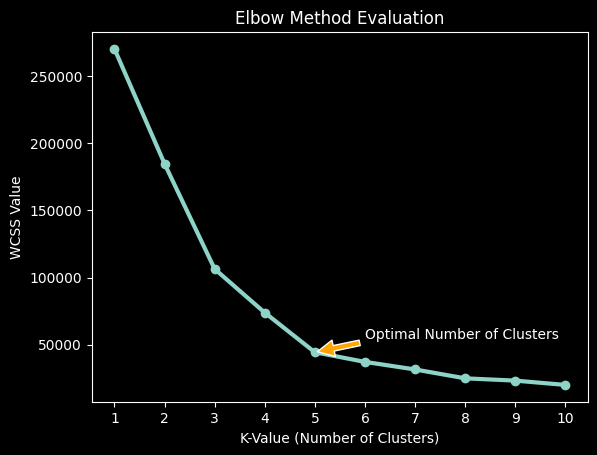

In [91]:
plt.plot(k_value_list, wcss_list, linewidth=3)
plt.scatter(k_value_list, wcss_list)
plt.xticks(k_value_list)

point_x = 5
point_y = wcss_list[point_x-1]

#add annotation
plt.annotate('Optimal Number of Clusters', xy=(point_x, point_y), xytext=(point_x+1, point_y+10000),
            arrowprops=dict(facecolor='orange', shrink=0.05),
            )

plt.title('Elbow Method Evaluation')
plt.xlabel('K-Value (Number of Clusters)')
plt.ylabel('WCSS Value')

Now, we can retrain the model with 5 clusters.

In [93]:
kmeans_model = KMeans(n_clusters=5, random_state=10)
X['Cluster'] = kmeans_model.fit_predict(X)
X.head()

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_37853/3951511431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans_model.fit_predict(X)


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


Visualization

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_37853/2799080188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ClusterColor'] = X['Cluster'].map(lambda c: color_list[c])


Text(0, 0.5, 'Spending Score (1-100)')

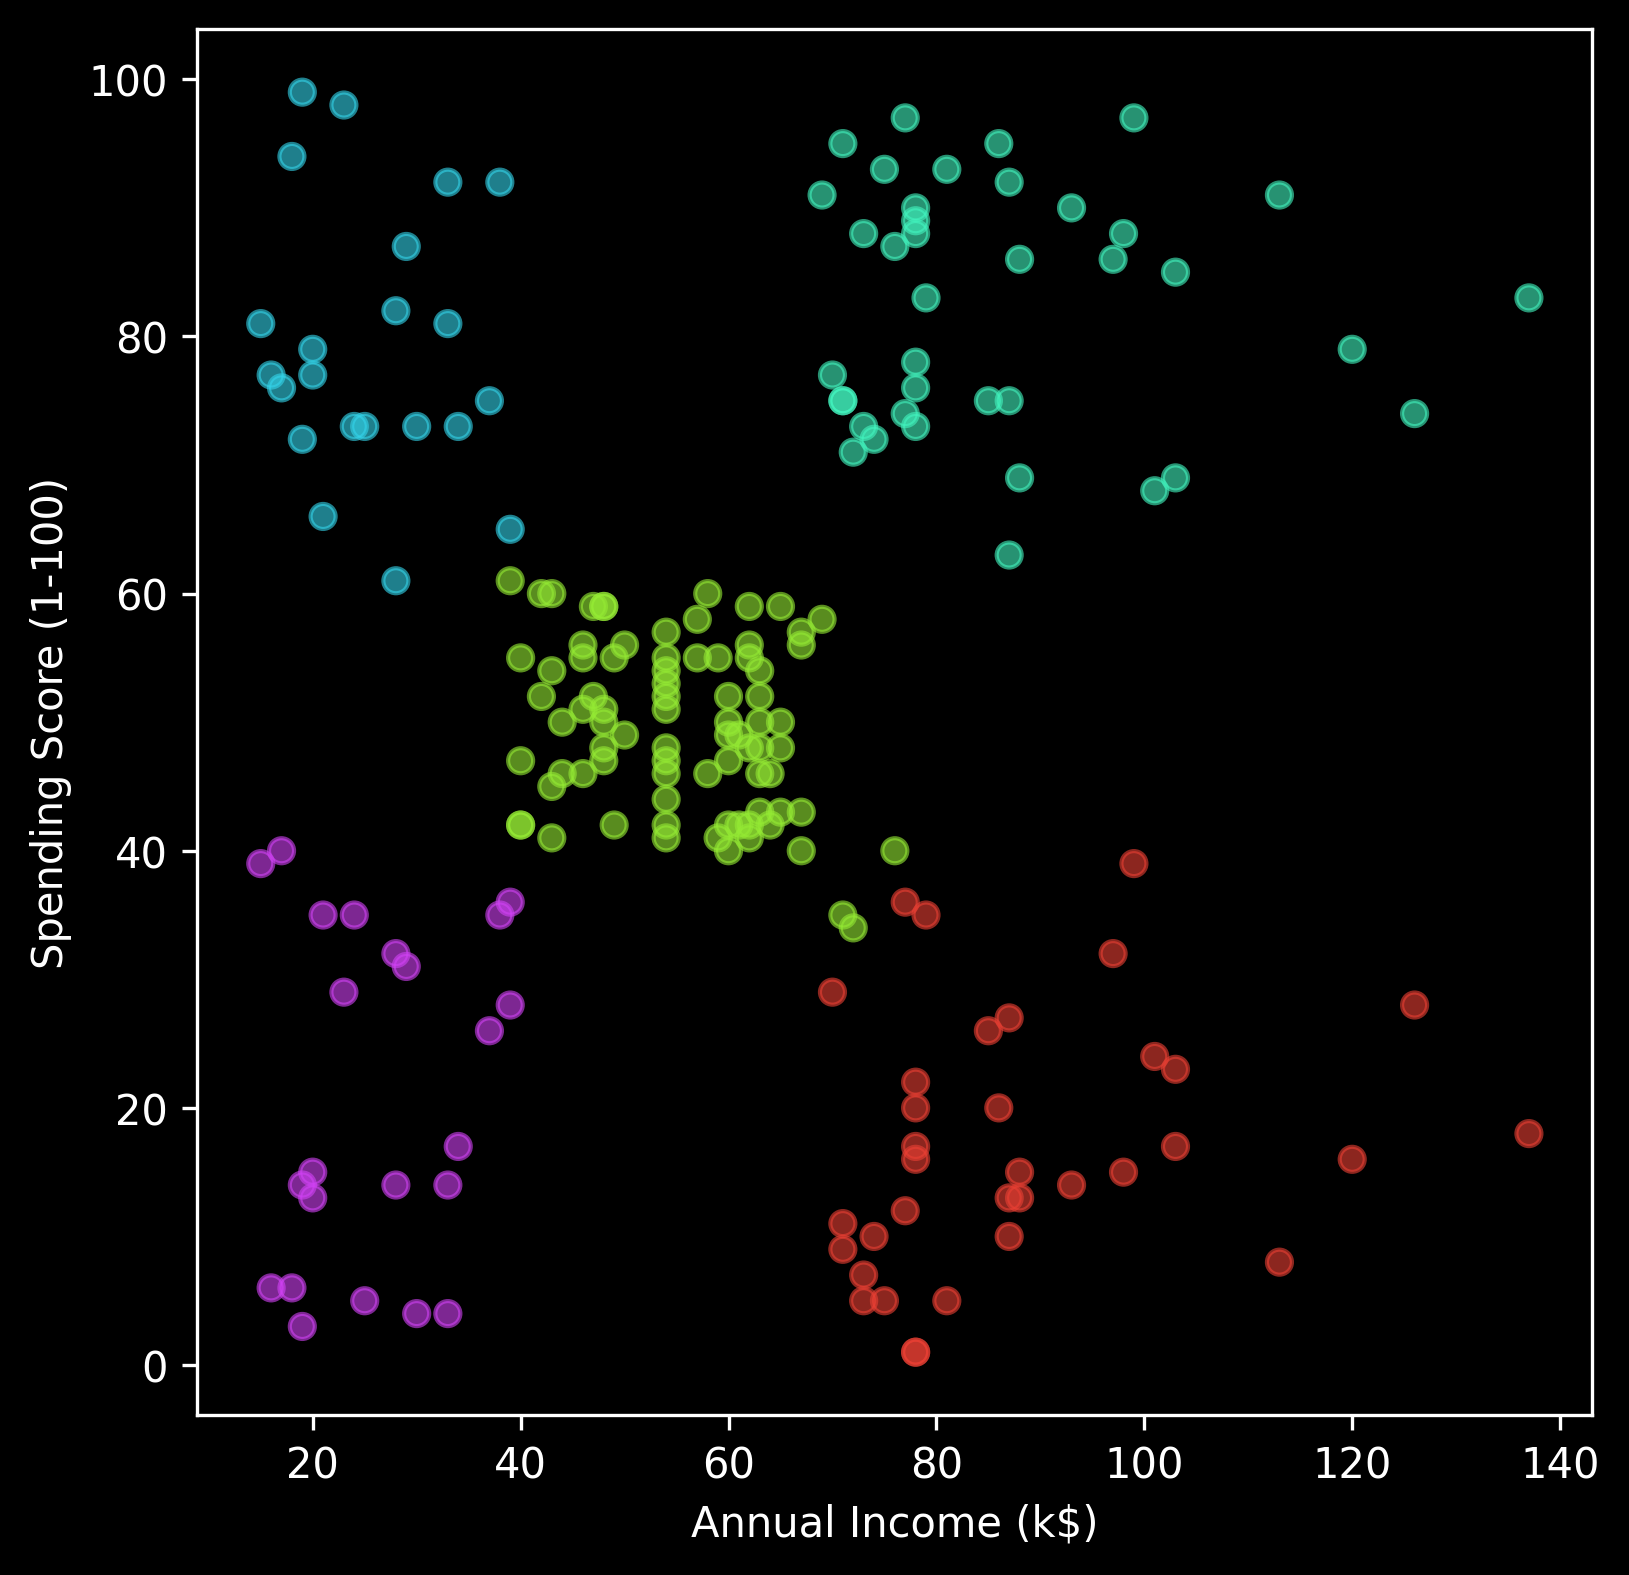

In [ ]:
color_list = ['#eb4034', '#95eb34', '#34d5eb', '#42f5bf', '#d142f5']
X['ClusterColor'] = X['Cluster'].map(lambda c: color_list[c])

plt.figure(figsize=(6,6), dpi=300)

#data points
plt.scatter(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], c=X['ClusterColor'], alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')


Text(0, 0.5, 'Spending Score (1-100)')

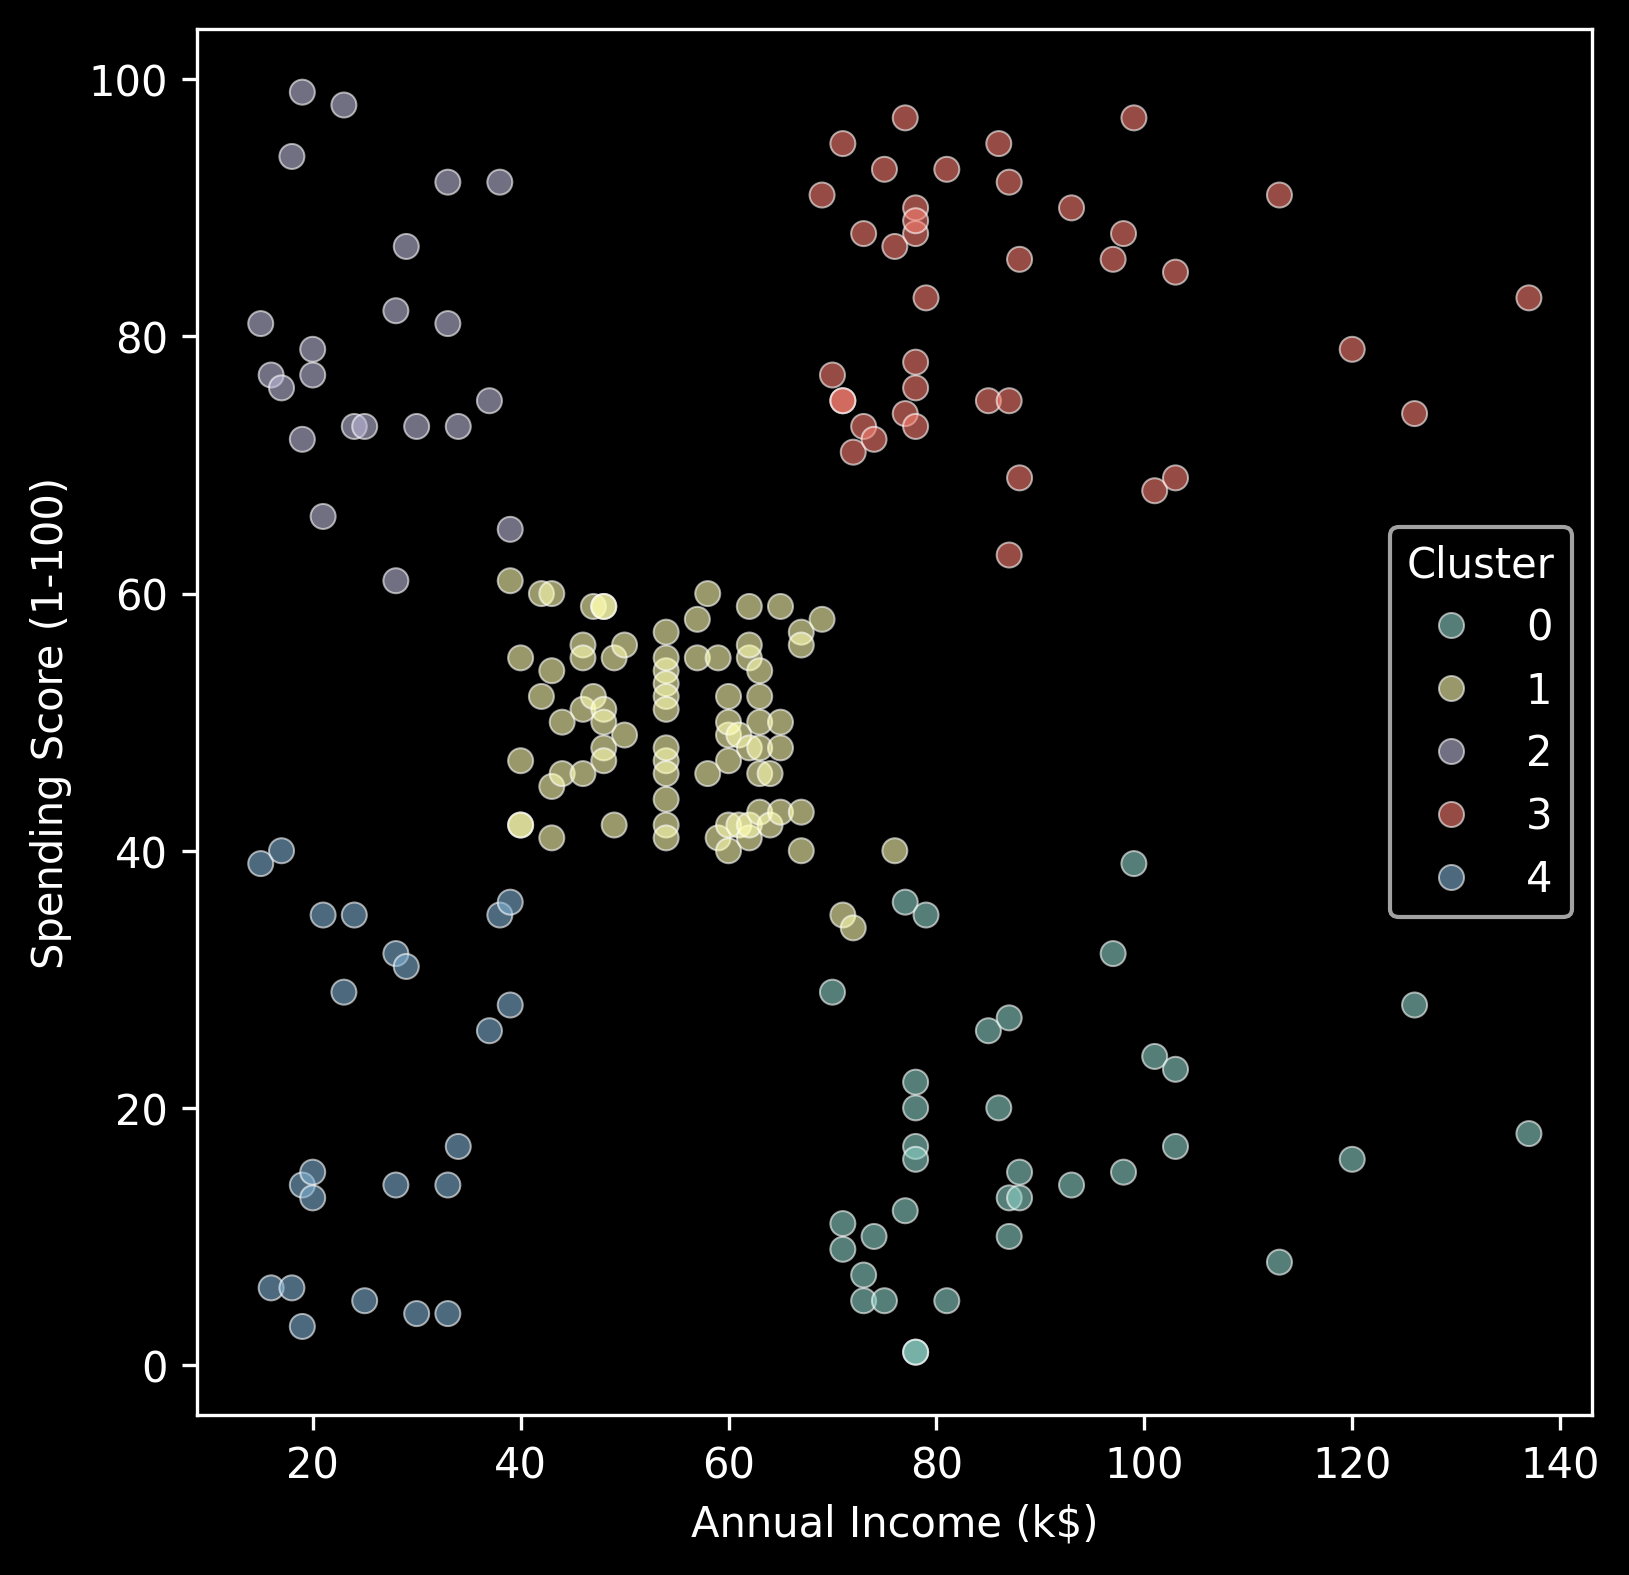

In [104]:
plt.figure(figsize=(6,6), dpi=300)

#data points
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], alpha=0.6, hue=X['Cluster'], palette='Set3')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
